In [1]:
# Python library and module imports
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import math
import h5py
import torch
from matplotlib.colors import LogNorm
import pandas as pd

# Add the path to the parent directory to augment search for module
par_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
if par_dir not in sys.path:
    sys.path.append(par_dir)
    
# Import the custom plotting module
from plot_utils import plot_utils

In [2]:
# Path to a sample event vs reconstruction file
np_arr_dir = "/home/akajal/WatChMaL/WatChMaL-VAE/USER/save_path_vae/data_description/"
np_arr_path = np_arr_dir + "20190602_233210/event_vs_recon_iteration_149999.npz"

# Load the numpy array
np_arr = np.load(np_arr_path)
np_event = np_arr["event"]
np_recon = np_arr["recon"]

print(np_event.shape)
print(np_recon.shape)

(32, 16, 40, 19)
(32, 16, 40, 19)


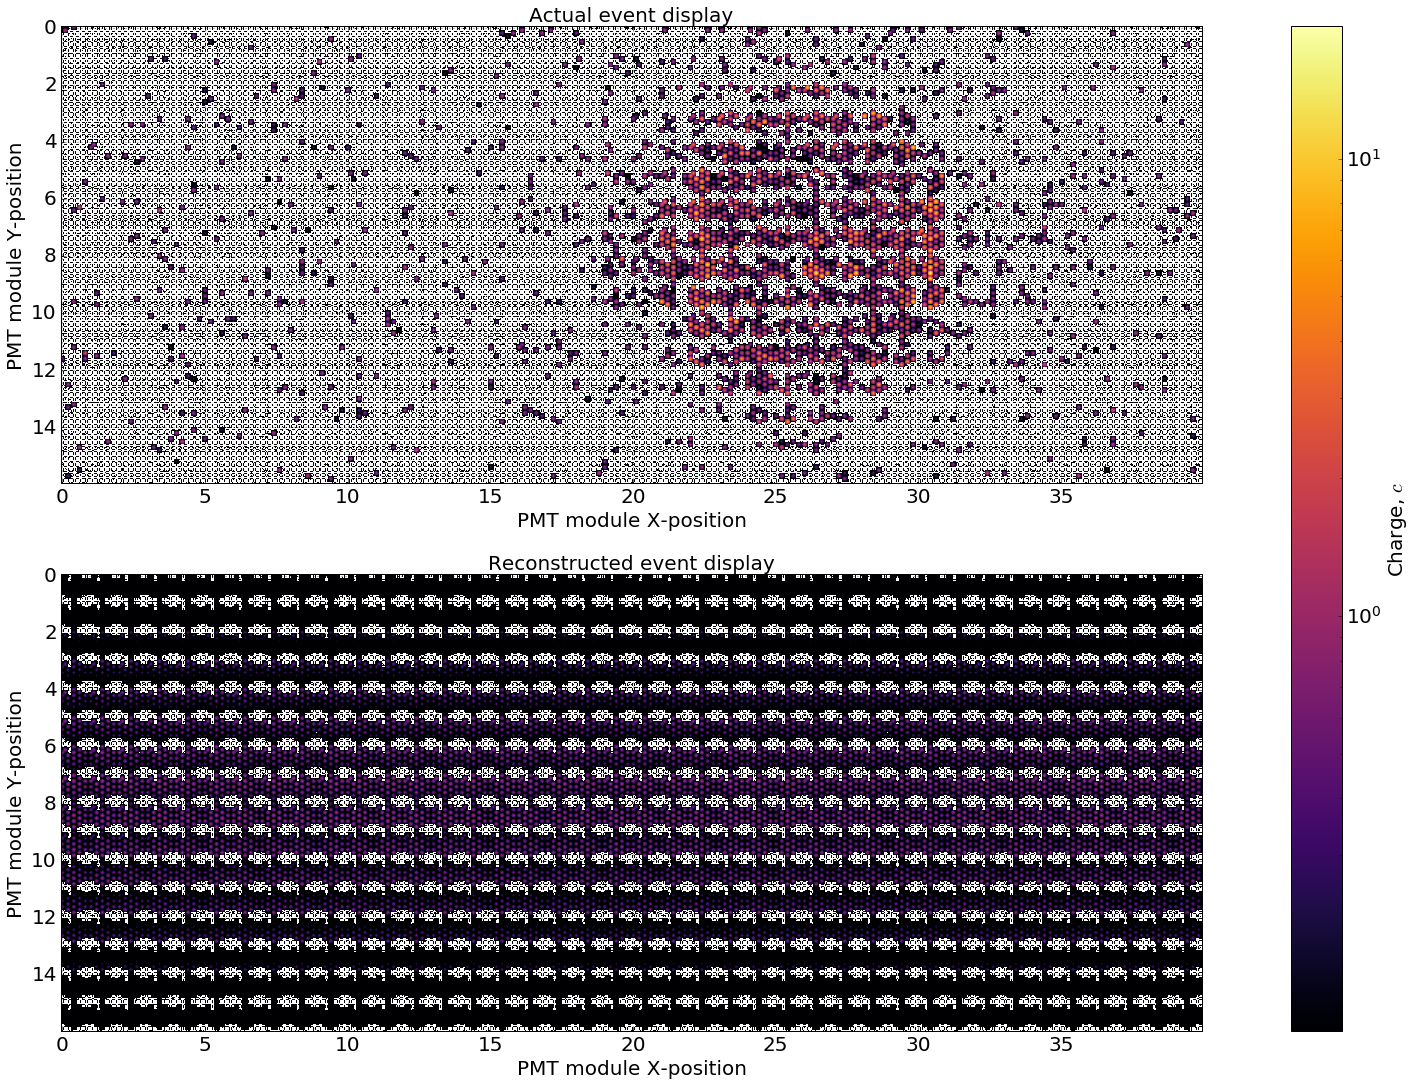

In [3]:
plot_utils.plot_actual_vs_recon(np_event[8], np_recon[8], show_plot=True)

In [7]:
np_mu = np_arr["mu"]
np_covar = np_arr["covar"]

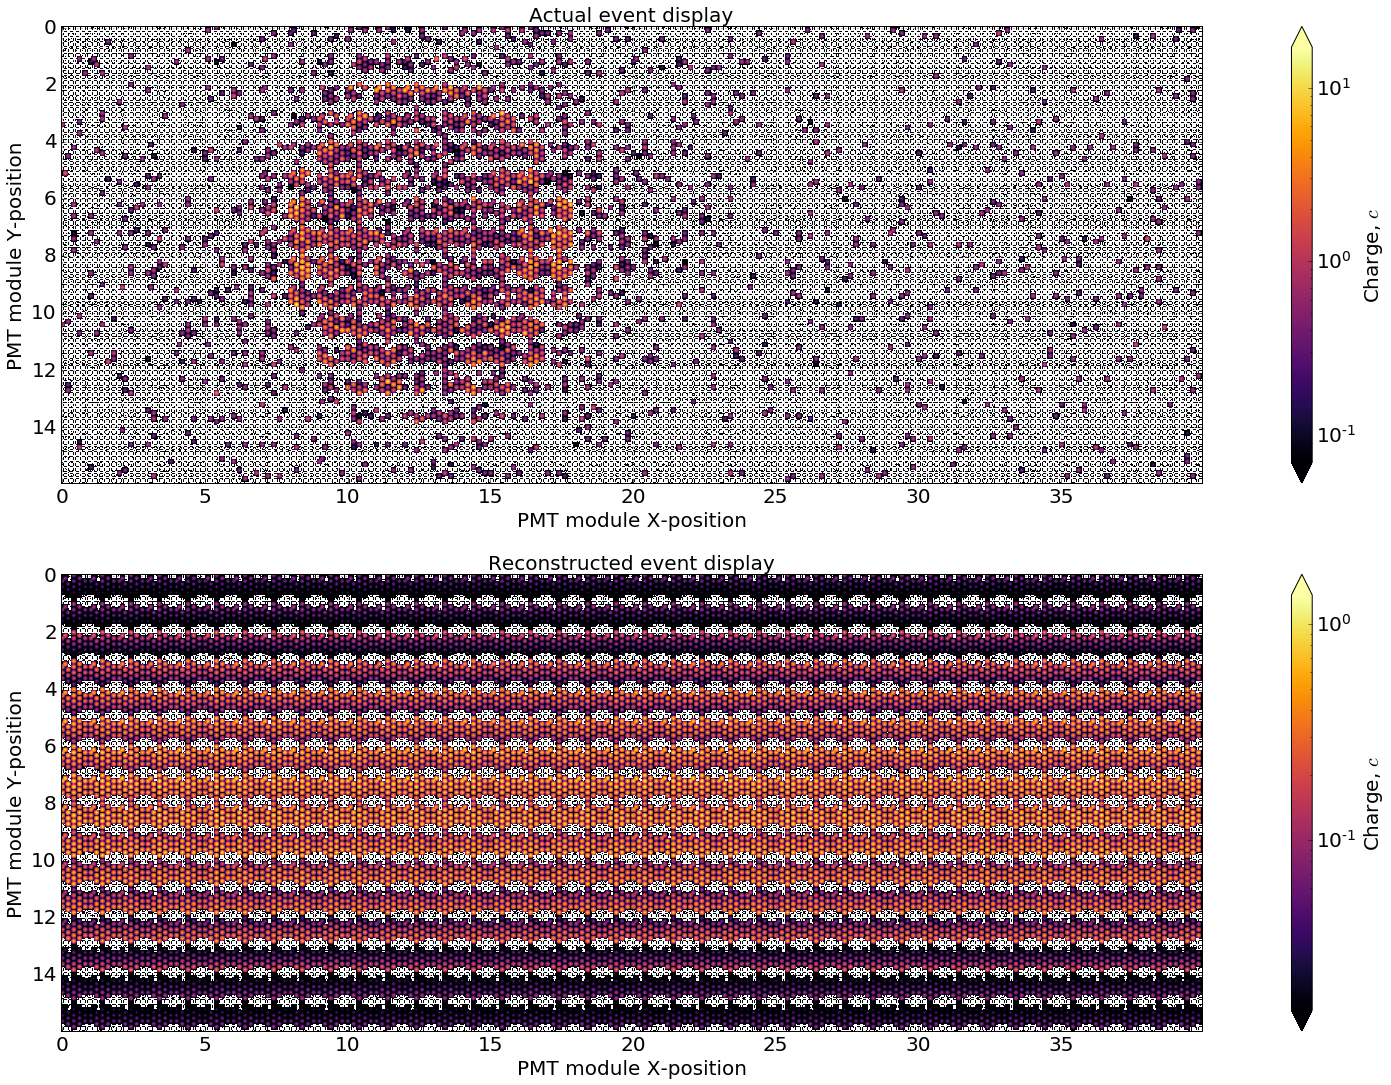

In [8]:
plot_utils.plot_actual_vs_recon(np_event[3], np_recon[3], show_plot=True)

In [9]:
print(np_mu.shape)
print(np_covar.shape)

(32, 32)
(32, 32)


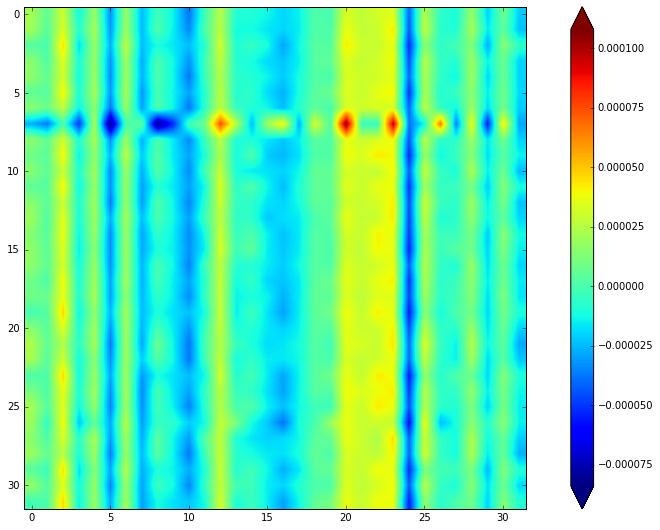

In [15]:
fig = plt.figure(figsize=(16,9))
im = plt.imshow(np_mu)
cbar = fig.colorbar(im, extend="both")

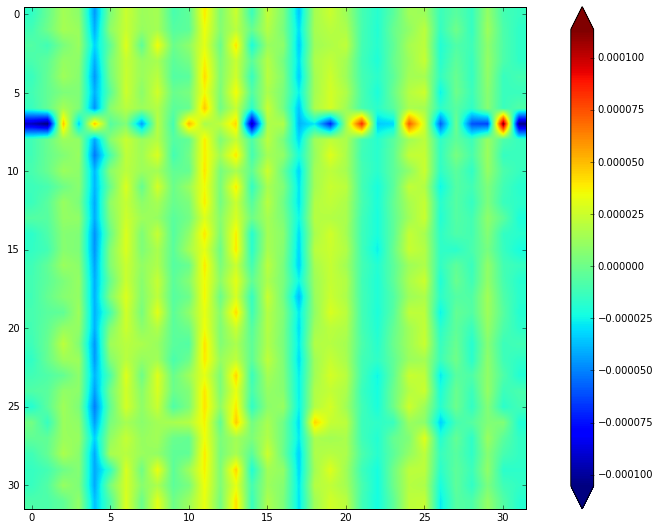

In [17]:
fig = plt.figure(figsize=(16,9))
im = plt.imshow(np_covar)
cbar = fig.colorbar(im, extend="both")

# Method to print the dimensions of the output given the input data dimensions, kernel size, padding, stride and dilation

In [26]:
def print_output_shape(input_size, output_channels, kernel_size, stride,
                       padding, dilation):
    
    print("Input size : num_channels {0}, height {1}, width {2}".format(input_size[0],
                                                                        input_size[1],
                                                                        input_size[2]))
    
    output_height = math.ceil((input_size[1] + 2*padding[0] - 
                               dilation[0]*(kernel_size[0] - 1))/stride[0]) + 1
    
    output_width = math.ceil((input_size[2] + 2*padding[1] - 
                               dilation[1]*(kernel_size[1] - 1))/stride[1]) + 1
    
    
    print("Output size : num_channels {0}, height {1}, width {2}".format(output_channels,
                                                                         output_height,
                                                                         output_width))
    
    return (output_channels, output_height, output_width)

# KazuNet Input Transformations

In [38]:
# Layer 1.
kazu_curr_size = (2, 168, 88)

In [39]:
# Layer 2.
kazu_curr_size = print_output_shape(input_size=kazu_curr_size,
                                         output_channels=16,
                                         kernel_size=(3,3),
                                         stride=(1,1),
                                         padding=(0,0),
                                         dilation=(1,1))

Input size : num_channels 2, height 168, width 88
Output size : num_channels 16, height 167, width 87


In [40]:
# Layer 3.
kazu_curr_size = print_output_shape(input_size=kazu_curr_size,
                                         output_channels=16,
                                         kernel_size=(2,2),
                                         stride=(2,2),
                                         padding=(0,0),
                                         dilation=(1,1))

Input size : num_channels 16, height 167, width 87
Output size : num_channels 16, height 84, width 44


In [41]:
# Layer 4.a
kazu_curr_size = print_output_shape(input_size=kazu_curr_size,
                                         output_channels=32,
                                         kernel_size=(3,3),
                                         stride=(1,1),
                                         padding=(0,0),
                                         dilation=(1,1))

Input size : num_channels 16, height 84, width 44
Output size : num_channels 32, height 83, width 43


In [42]:
# Layer 4.b
kazu_curr_size = print_output_shape(input_size=kazu_curr_size,
                                         output_channels=32,
                                         kernel_size=(3,3),
                                         stride=(1,1),
                                         padding=(0,0),
                                         dilation=(1,1))

Input size : num_channels 32, height 83, width 43
Output size : num_channels 32, height 82, width 42


In [43]:
# Layer 5.
kazu_curr_size = print_output_shape(input_size=kazu_curr_size,
                                         output_channels=32,
                                         kernel_size=(2,2),
                                         stride=(2,2),
                                         padding=(0,0),
                                         dilation=(1,1))

Input size : num_channels 32, height 82, width 42
Output size : num_channels 32, height 42, width 22


In [44]:
# Layer 6.a
kazu_curr_size = print_output_shape(input_size=kazu_curr_size,
                                         output_channels=64,
                                         kernel_size=(3,3),
                                         stride=(1,1),
                                         padding=(0,0),
                                         dilation=(1,1))

Input size : num_channels 32, height 42, width 22
Output size : num_channels 64, height 41, width 21


In [45]:
# Layer 6.b
kazu_curr_size = print_output_shape(input_size=kazu_curr_size,
                                         output_channels=64,
                                         kernel_size=(3,3),
                                         stride=(1,1),
                                         padding=(0,0),
                                         dilation=(1,1))

Input size : num_channels 64, height 41, width 21
Output size : num_channels 64, height 40, width 20


In [46]:
# Layer 7.
kazu_curr_size = print_output_shape(input_size=kazu_curr_size,
                                         output_channels=64,
                                         kernel_size=(2,2),
                                         stride=(2,2),
                                         padding=(0,0),
                                         dilation=(1,1))

Input size : num_channels 64, height 40, width 20
Output size : num_channels 64, height 21, width 11


In [47]:
# Layer 8.a
kazu_curr_size = print_output_shape(input_size=kazu_curr_size,
                                         output_channels=128,
                                         kernel_size=(3,3),
                                         stride=(1,1),
                                         padding=(0,0),
                                         dilation=(1,1))

Input size : num_channels 64, height 21, width 11
Output size : num_channels 128, height 20, width 10


In [48]:
# Layer 8.b
kazu_curr_size = print_output_shape(input_size=kazu_curr_size,
                                         output_channels=128,
                                         kernel_size=(3,3),
                                         stride=(1,1),
                                         padding=(0,0),
                                         dilation=(1,1))

Input size : num_channels 128, height 20, width 10
Output size : num_channels 128, height 19, width 9


In [51]:
kazu_curr_height = math.ceil(((kazu_curr_size[1] - kazu_curr_size[1])/kazu_curr_size[1]) + 1)
kazu_curr_width = math.ceil(((kazu_curr_size[0] - kazu_curr_size[0])/kazu_curr_size[0]) + 1)

print(128, kazu_curr_height, kazu_curr_width)

128 1 1


# IWCD Input Transformations

In [52]:
# Layer 1
iwcd_curr_size = (38, 16, 40)

In [53]:
iwcd_curr_size = print_output_shape(input_size=iwcd_curr_size,
                                         output_channels=16,
                                         kernel_size=(3,3),
                                         stride=(1,1),
                                         padding=(0,0),
                                         dilation=(1,1))

Input size : num_channels 38, height 16, width 40
Output size : num_channels 16, height 15, width 39


In [54]:
# Layer 3.
iwcd_curr_size = print_output_shape(input_size=iwcd_curr_size,
                                         output_channels=16,
                                         kernel_size=(2,2),
                                         stride=(2,2),
                                         padding=(0,0),
                                         dilation=(1,1))

Input size : num_channels 16, height 15, width 39
Output size : num_channels 16, height 8, width 20


In [55]:
# Layer 4.a
iwcd_curr_size = print_output_shape(input_size=iwcd_curr_size,
                                         output_channels=32,
                                         kernel_size=(3,3),
                                         stride=(1,1),
                                         padding=(0,0),
                                         dilation=(1,1))

Input size : num_channels 16, height 8, width 20
Output size : num_channels 32, height 7, width 19


In [56]:
# Layer 4.b
iwcd_curr_size = print_output_shape(input_size=iwcd_curr_size,
                                         output_channels=32,
                                         kernel_size=(3,3),
                                         stride=(1,1),
                                         padding=(0,0),
                                         dilation=(1,1))

Input size : num_channels 32, height 7, width 19
Output size : num_channels 32, height 6, width 18


In [57]:
# Layer 5.
iwcd_curr_size = print_output_shape(input_size=iwcd_curr_size,
                                         output_channels=32,
                                         kernel_size=(2,2),
                                         stride=(2,2),
                                         padding=(0,0),
                                         dilation=(1,1))

Input size : num_channels 32, height 6, width 18
Output size : num_channels 32, height 4, width 10


In [58]:
# Layer 6.a
iwcd_curr_size = print_output_shape(input_size=iwcd_curr_size,
                                         output_channels=64,
                                         kernel_size=(3,3),
                                         stride=(1,1),
                                         padding=(0,0),
                                         dilation=(1,1))

Input size : num_channels 32, height 4, width 10
Output size : num_channels 64, height 3, width 9


In [59]:
# Layer 6.b
iwcd_curr_size = print_output_shape(input_size=iwcd_curr_size,
                                         output_channels=64,
                                         kernel_size=(3,3),
                                         stride=(1,1),
                                         padding=(0,0),
                                         dilation=(1,1))

Input size : num_channels 64, height 3, width 9
Output size : num_channels 64, height 2, width 8


In [60]:
# Layer 7.
iwcd_curr_size = print_output_shape(input_size=iwcd_curr_size,
                                         output_channels=64,
                                         kernel_size=(2,2),
                                         stride=(2,2),
                                         padding=(0,0),
                                         dilation=(1,1))

Input size : num_channels 64, height 2, width 8
Output size : num_channels 64, height 2, width 5


In [61]:
# Layer 8.a
iwcd_curr_size = print_output_shape(input_size=iwcd_curr_size,
                                         output_channels=128,
                                         kernel_size=(3,3),
                                         stride=(1,1),
                                         padding=(0,0),
                                         dilation=(1,1))

Input size : num_channels 64, height 2, width 5
Output size : num_channels 128, height 1, width 4


In [62]:
# Layer 8.b
iwcd_curr_size = print_output_shape(input_size=iwcd_curr_size,
                                         output_channels=128,
                                         kernel_size=(3,3),
                                         stride=(1,1),
                                         padding=(0,0),
                                         dilation=(1,1))

Input size : num_channels 128, height 1, width 4
Output size : num_channels 128, height 0, width 3


# Should throw an error here since the dim. goes to 0

# Vae2cnet training analysis

## vae2cnet with batch normalization after relu on conv. layers 1 and 2

### Problem : The csv files saved for both resnet18 and vaecnet2 do not have an identifier which uniquely distinguishes the resulting files

### Solution : Will have to use observations from the run :
    1. The vae2cnet was run earlier than the resnet18 so should have the first file.

In [4]:
# Setup the path to the train and validation log files

# Log files for the vae2cnet
vae2cnet_train_log_path = "/home/akajal/WatChMaL/WatChMaL-VAE/save_path/data_description/20190603_174005/log_train.csv"
vae2cnet_val_log_path = "/home/akajal/WatChMaL/WatChMaL-VAE/save_path/data_description/20190603_174005/val_test.csv"

resnet18_train_log_path = "/home/akajal/WatChMaL/WatChMaL-VAE/save_path/data_description/20190603_174613/log_train.csv"
resnet18_val_log_path = "/home/akajal/WatChMaL/WatChMaL-VAE/save_path/data_description/20190603_174613/val_test.csv"

In [5]:
vae2cnet_train_df = pd.read_csv(vae2cnet_train_log_path)
vae2cnet_val_df = pd.read_csv(vae2cnet_val_log_path)

resnet18_train_df = pd.read_csv(resnet18_train_log_path)
resnet18_val_df = pd.read_csv(resnet18_val_log_path)

In [6]:
display(vae2cnet_train_df)

,iteration,epoch,accuracy,loss
0,1.0,0.000044,0.31250,1.098204
1,2.0,0.000089,0.37500,1.093996
2,3.0,0.000133,0.34375,1.099066
3,4.0,0.000178,0.28125,1.100922
4,5.0,0.000222,0.25000,1.099781
5,6.0,0.000267,0.34375,1.094398
6,7.0,0.000311,0.46875,1.092837
7,8.0,0.000356,0.31250,1.099730
8,9.0,0.000400,0.25000,1.102769
9,10.0,0.000444,0.37500,1.094034


In [7]:
display(vae2cnet_val_df)

,iteration,epoch,accuracy,loss
0,100.0,0.004444,0.25000,1.099556
1,200.0,0.008889,0.40625,1.063527
2,300.0,0.013333,0.40625,1.030975
3,400.0,0.017778,0.68750,0.847042
4,500.0,0.022222,0.71875,0.795028
5,600.0,0.026667,0.59375,0.860798
6,700.0,0.031111,0.65625,0.837501
7,800.0,0.035556,0.75000,0.773358
8,900.0,0.040000,0.78125,0.752333
9,1000.0,0.044444,0.75000,0.806371


In [8]:
import scipy.signal as signal

# Plot the log data

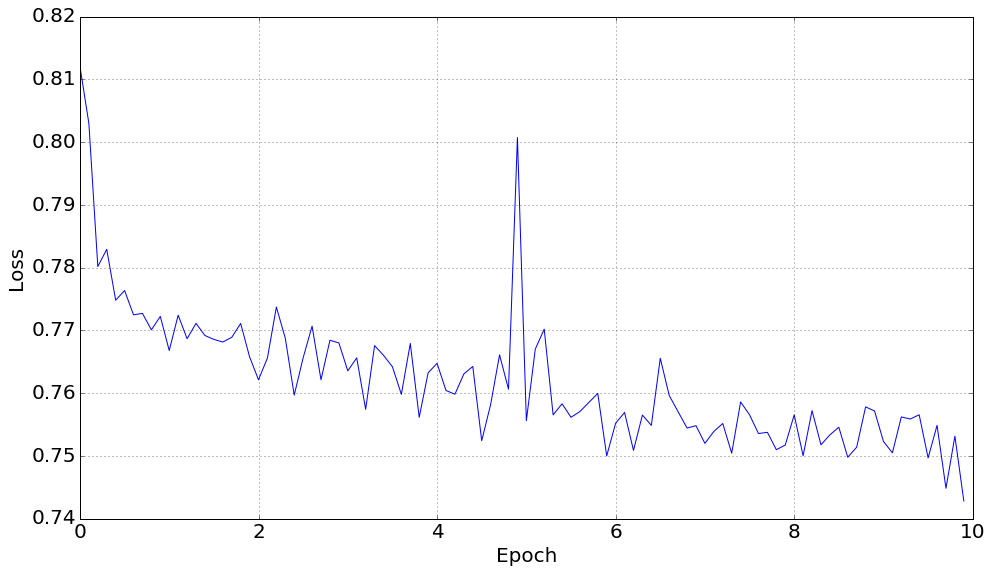

In [117]:
# Downsample the loss
vae2cnet_loss = signal.resample(vae2cnet_train_df["loss"].values, 100)

fig, ax = plt.subplots(figsize=(16,9))
ax.plot([i for i in range(len(vae2cnet_loss))],vae2cnet_loss)
ax.set_ylabel("Loss", fontsize=20)
ax.set_xlabel("Epoch", fontsize=20)

ax.set_xticklabels((ax.get_xticks()/10).astype(int))
ax.tick_params(labelsize=20)
ax.grid(True)

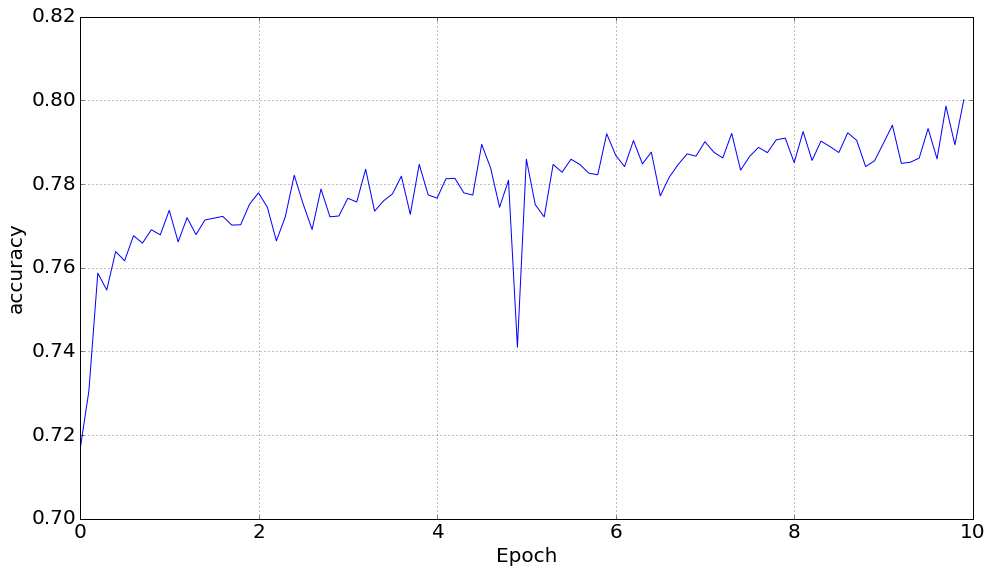

In [118]:
# Downsample the loss
vae2cnet_accuracy = signal.resample(vae2cnet_train_df["accuracy"].values, 100)

fig, ax = plt.subplots(figsize=(16,9))
ax.plot([i for i in range(len(vae2cnet_accuracy))],vae2cnet_accuracy)
ax.set_ylabel("accuracy", fontsize=20)
ax.set_xlabel("Epoch", fontsize=20)

ax.set_xticklabels((ax.get_xticks()/10).astype(int))
ax.tick_params(labelsize=20)
ax.grid(True)

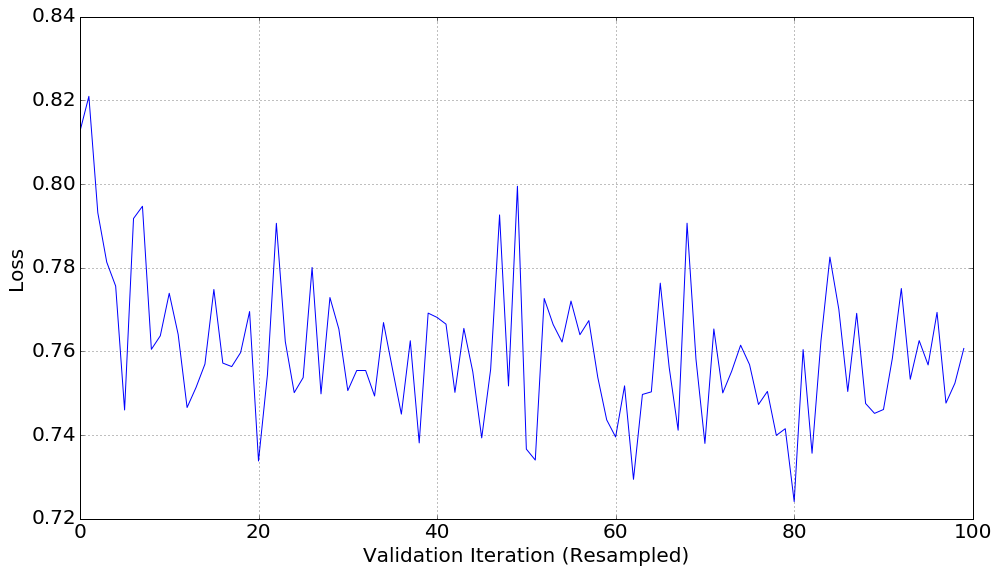

In [120]:
# Downsample the loss
vae2cnet_loss = signal.resample(vae2cnet_val_df["loss"].values, 100)

fig, ax = plt.subplots(figsize=(16,9))
ax.plot([i for i in range(len(vae2cnet_loss))],vae2cnet_loss)
ax.set_ylabel("Loss", fontsize=20)
ax.set_xlabel("Validation Iteration (Resampled)", fontsize=20)

ax.tick_params(labelsize=20)
ax.grid(True)

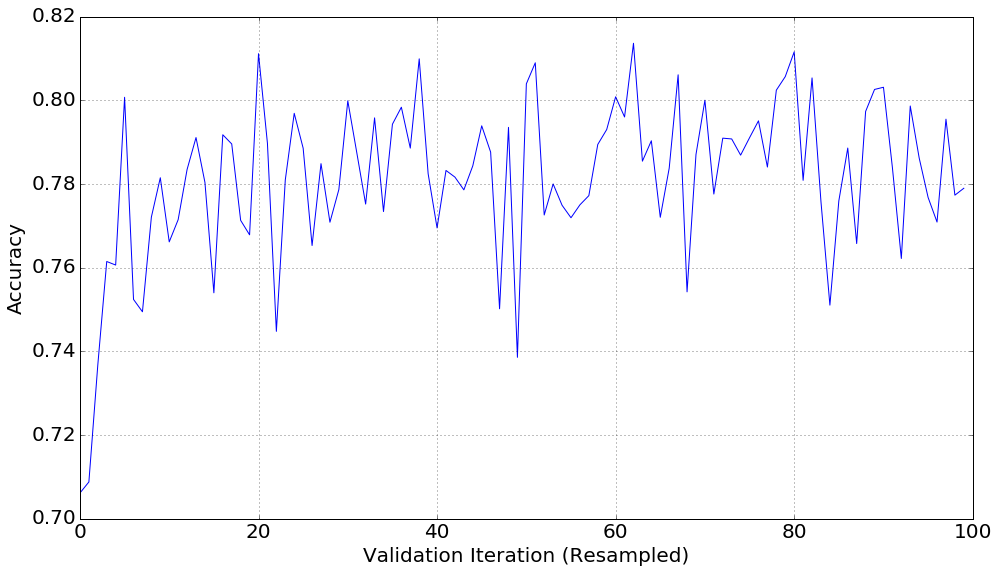

In [128]:
# Downsample the loss
vae2cnet_loss = signal.resample(vae2cnet_val_df["accuracy"].values, 100)

fig, ax = plt.subplots(figsize=(16,9))
ax.plot([i for i in range(len(vae2cnet_loss))],vae2cnet_loss)
ax.set_ylabel("Accuracy", fontsize=20)
ax.set_xlabel("Validation Iteration (Resampled)", fontsize=20)

ax.tick_params(labelsize=20)
ax.grid(True)

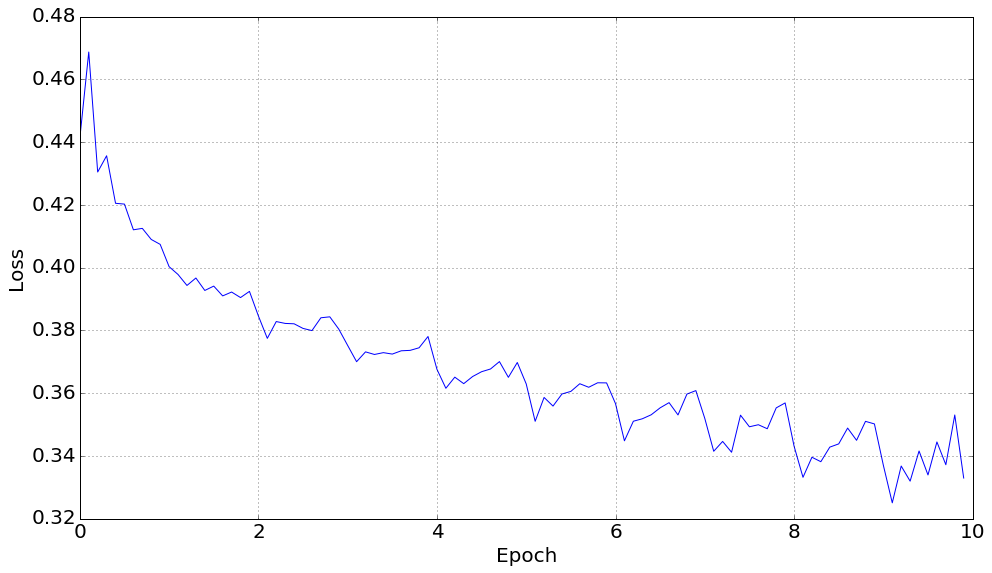

In [12]:
# Downsample the loss
vae2cnet_loss = signal.resample(resnet18_train_df["loss"].values, 100)

fig, ax = plt.subplots(figsize=(16,9))
ax.plot([i for i in range(len(vae2cnet_loss))],vae2cnet_loss)
ax.set_ylabel("Loss", fontsize=20)
ax.set_xlabel("Epoch", fontsize=20)

ax.set_xticklabels((ax.get_xticks()/10).astype(int))
ax.tick_params(labelsize=20)
ax.grid(True)

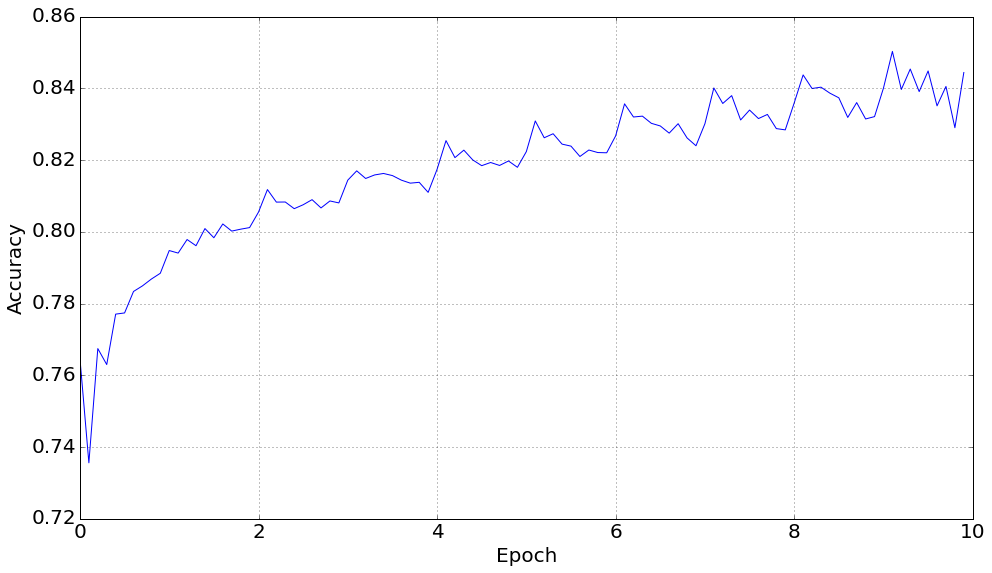

In [129]:
# Downsample the loss
vae2cnet_loss = signal.resample(resnet18_train_df["accuracy"].values, 100)

fig, ax = plt.subplots(figsize=(16,9))
ax.plot([i for i in range(len(vae2cnet_loss))],vae2cnet_loss)
ax.set_ylabel("Accuracy", fontsize=20)
ax.set_xlabel("Epoch", fontsize=20)

ax.set_xticklabels((ax.get_xticks()/10).astype(int))
ax.tick_params(labelsize=20)
ax.grid(True)

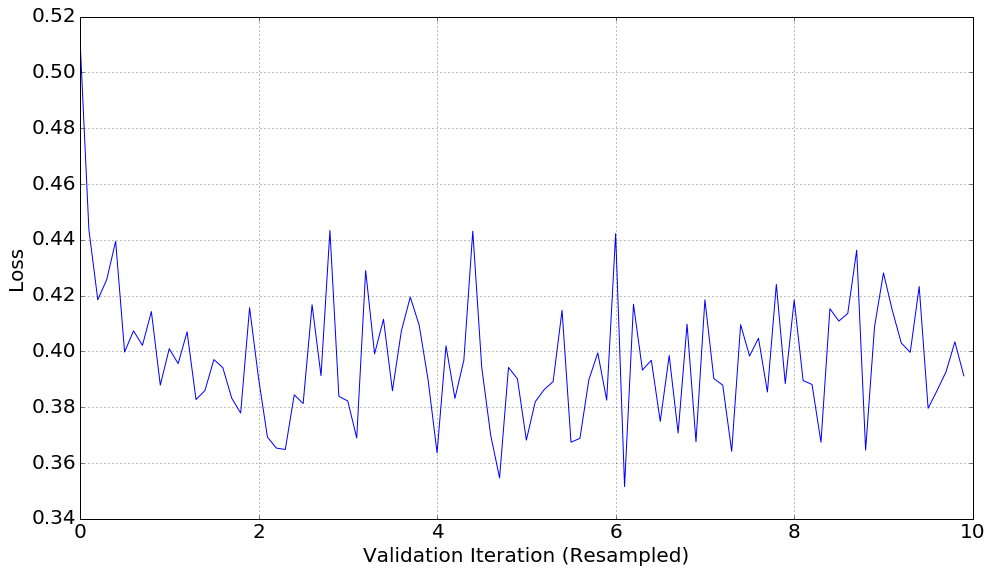

In [127]:
# Downsample the loss
vae2cnet_loss = signal.resample(resnet18_val_df["loss"].values, 100)

fig, ax = plt.subplots(figsize=(16,9))
ax.plot([i for i in range(len(vae2cnet_loss))],vae2cnet_loss)
ax.set_ylabel("Loss", fontsize=20)
ax.set_xlabel("Validation Iteration (Resampled)", fontsize=20)

ax.set_xticklabels((ax.get_xticks()/10).astype(int))
ax.tick_params(labelsize=20)
ax.grid(True)

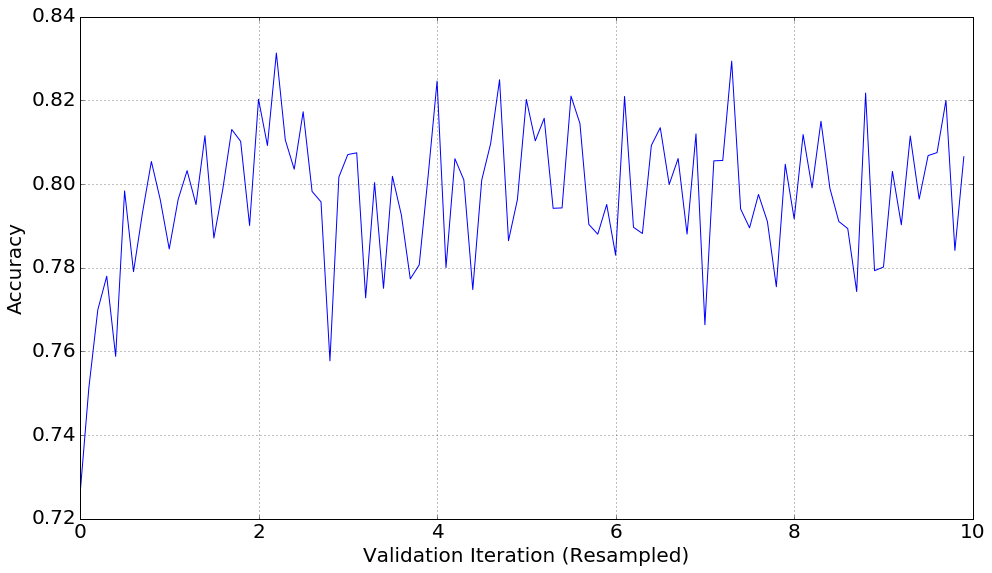

In [130]:
# Downsample the loss
vae2cnet_loss = signal.resample(resnet18_val_df["accuracy"].values, 100)

fig, ax = plt.subplots(figsize=(16,9))
ax.plot([i for i in range(len(vae2cnet_loss))],vae2cnet_loss)
ax.set_ylabel("Accuracy", fontsize=20)
ax.set_xlabel("Validation Iteration (Resampled)", fontsize=20)

ax.set_xticklabels((ax.get_xticks()/10).astype(int))
ax.tick_params(labelsize=20)
ax.grid(True)